In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
data = pd.read_csv('train.csv')
data.tail()

,image,species,individual_id
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e
51032,fffdcd42312777.jpg,bottlenose_dolphin,4ddb2eeb5efb


In [4]:
counter = {}
for row_num, row in data.iterrows():
    try:
        counter[row['individual_id']] += 1
    except:
        counter[row['individual_id']] = 1

1개 혹은 2개 만의 image를 가진 indivisual id 다수
38개 이상으로 더 많은 image를 가진
유일한 indivisual id를 가진 이미지 9258 그 외 41774


In [40]:
# -9258
41774 * 41773

1745025302

c:\Users\Lee\anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

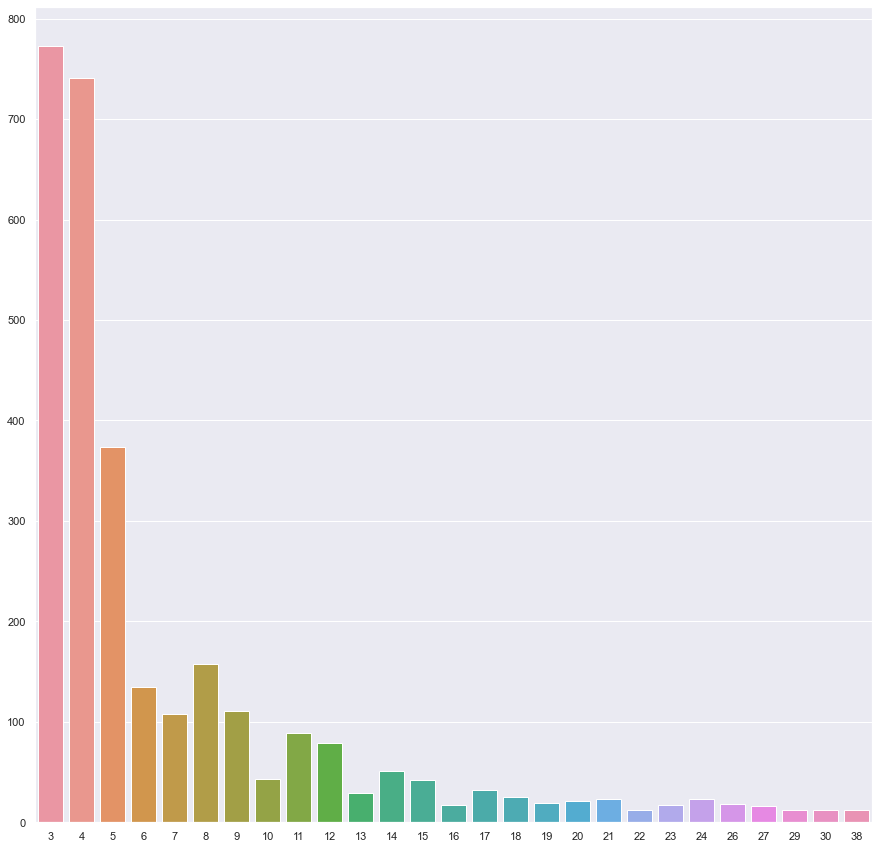

In [35]:
import seaborn as sns
value_counter = []
value_index = []
for value_count in range(max(counter.values())):
    value_count_value = list(counter.values()).count(value_count)
    if value_count_value < 10:
        continue
    value_counter.append(value_count_value)
    value_index.append(value_count)
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(value_index[2:], value_counter[2:])

In [34]:
sum(value_counter[40:])

165

In [56]:
print(len(data['image'].values))
print(len(set(data['image'].values)))

51033
51033


In [59]:
maked_data = pd.DataFrame(columns=['image1', 'image2', 'individual_id', 'species'])
for category in list(set(data['individual_id'])):
    temp_df = pd.DataFrame()
    images = list(data[data['individual_id'] == category]['image'].values)
    first_images = []
    second_images = []
    temp_images = images
    for index, image1 in enumerate(images):
        for image2 in temp_images:
            first_images.append(image1)
            second_images.append(image2)
        del temp_images[index]
    
    temp_df['image1'] = pd.Series(first_images)
    temp_df['image2'] = pd.Series(second_images)
    temp_df['individual_id'] = category
    if len(list(set(data[data['individual_id'] == category]['species']))) > 1:
        raise "species suppose to be 1"
    temp_df['species'] = list(set(data[data['individual_id'] == category]['species']))[0]
    
    maked_data = maked_data.append(temp_df, ignore_index = True)

In [60]:
maked_data.tail()
#582939	71b61d11e1b4d3.jpg	71b61d11e1b4d3.jpg	8cf556d2deb3	humpback_whale

,image1,image2,individual_id,species
582935,55d16898f22f4f.jpg,55d16898f22f4f.jpg,4871a3751a86,blue_whale
582936,55d16898f22f4f.jpg,9990f21d55be90.jpg,4871a3751a86,blue_whale
582937,efb53d2e25c25d.jpg,efb53d2e25c25d.jpg,cc646eadbff3,blue_whale
582938,e8f886f9465d69.jpg,e8f886f9465d69.jpg,5bfff69d5090,gray_whale
582939,71b61d11e1b4d3.jpg,71b61d11e1b4d3.jpg,8cf556d2deb3,humpback_whale


In [61]:
unique = []
for image1, image2 in maked_data[['image1', 'image2']].values:
    if image1 != image2:
        unique.append(f'{image1}_{image2}')
    else:
        unique.append(f'{image2}_{image1}')   

In [63]:
maked_data.to_csv('image_combination.csv', index=False)

In [5]:
data = pd.read_csv('image_combination.csv')
train_data = pd.read_csv('train.csv')
print(len(data))
print(len(train_data))

582940
51033


In [6]:
print(len(set(data['image1'].values)))
print(len(set(data['image2'].values)))

31033
51033


In [30]:
cnt = 0
for _,row in tqdm(data.iterrows()):
    image1_type = train_data[train_data['image'] == row['image1']]['individual_id'].values[0]
    image2_type = train_data[train_data['image'] == row['image2']]['individual_id'].values[0]
    if image1_type == image2_type:
        cnt += 1
    else:
        print('wrong combination')

582940it [50:13, 193.46it/s]


In [29]:
cnt / len(data)

0.10576731739115518

In [3]:
dataframe = pd.read_csv('0_npy_image.csv')
for i in range(1,8):
    temp = pd.read_csv(f'{i}_npy_image.csv')
    dataframe = dataframe.append(temp)

In [4]:
dataframe.drop('Unnamed: 0',inplace=True, axis=1)

In [5]:
print(len(set(dataframe['npy'].values)))
print(len(dataframe))

51040
51040


In [ ]:
dataframe.to_csv('all_train_npy.csv',index=False)